In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# ETL (Extraction, Transform, Load)

**How is our dataset organized and is there any foreseeable issues with it?**

*   The dataset is split into 2 csv files - one for fake data and the other for real data
*   Each data sample has a title, text, subject, and date
* We will need to concat the data together to have a 


**If you were collecting the data would you have organized it differently?**
*   I believe the data was organized pretty well.
* To make it even more simpler/quicker to use, I might have concatenated and added the labels to the csv already

**How was the data generated and do you believe this to be the best way?**

*   We don't know much about how the data was generated. 

**Is there any background on the dataset that could be useful to us?**
​
* Our goal is to predict the truthfullness of an article (i.e. is the article fake or real) using the dataset
* Not much else was given about the dataset

# EDA (Exploratory Data Analysis)

**What are some strengths and weaknesses of your current dataset?**

*   *Strength:* It is organized in a easy to use format - csv
* *Weakness:* Since we don't know much about the dataset, it may be hard to find issues with it

**What features can we create to improve the health of this dataset?**

*   Maybe creating the most relevant topic for each article and figuring out a pattern that relates topic to a fake or real?

**Are there any features you would want but are unable to create?**
* None as of right now

**Are a majority of our features one datatype and is this a good or bad thing?**
* The features are all strings, which is ideal for nlp problems

# Feature Engineering

**What is your target variable?**
* I created the target variable called 'label' that identifies each data sample as fake or real

**What are the original features of this dataset?**
* Original features are the articles' {title, text, subject, and date}

**What are the easiest features for you to expand upon?**
* I think the text feature was ideal to tokenize and use to predict which data sample was real and which one was fake

**What are the most difficult?**
* For now, I only used text to identify which data sample was real and which one was fake - but I believe others can also be used, in which case, the data may be difficult to expand on. 

**Value for your time?**
* None
​

**Model Training**

**Which models are easiest for you to use?**
* Easiest to use is a nlp neural network classifier, which is what I used
* Other models that can be used include RNNs, LSTMs, and even Transformers

**Which model best fits the features of our expanded dataframe?**
* I think any of the above models can be used for the purpose

**Which set of model best captures the relationship of our target variable with the data?**
* All the above models can capture the relationship between the text of the article and the label pretty well 
* I chose a simple nlp neural network classifier that uses tokenized (word) text sequences

**Over/Underfitting?**
* The model performed really well on the training data set (with an accuracy of 100%, but it also performed really well on the validation and testing datasets, so it was able to generalize - which indicates that it didn't underfit, and it also performed well on the testing dataset, so it didn't overfit either
​

# Other

**What are our libraries of choice?**


*   I chose the Tensorflow Keras for building the model since I had some expereince using it for nlp before, but I will be working on a model using Pytorch as well to learn how to use Pytorch
*   Sklearn for data splitting and model evaluation 


**Do we need to use NLP to solve this problem?**
* Yes, you will need NLP to solve this problem, since you need the computer to understand the the text in order to predict if it's fake or real 
* More specifically you are solving a classification problem that uses word tokenized sequences as input into nlp neural network classifier

**What is the best method to creating a Hyperparameter table?**
* Keras has a built-in parameter tuner, but I didn't end up using it

**What was the biggest difficulty in this assignment?**
* Figuring out the feature to input into the model and why the model is performing soo well from the start of training

In [5]:
# !pip install nltk
import nltk
# nltk.download()

In [172]:
import pandas as pd
from sklearn.utils import shuffle

dfFake = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tangible AI - Weekly Assignments/Data/Fake.csv')
dfFake['label'] = 0

dfReal = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tangible AI - Weekly Assignments/Data/True.csv')
dfReal['label'] = 1

In [173]:
df = pd.concat([dfFake, dfReal])
df = shuffle(df)

In [174]:
df2 = df['text'].str.lower()

In [175]:
df.head()

title  ... label
10459  Republican Kasich says does not need delegate ...  ...     1
3028   Leading U.S. senator urges changes in foreign ...  ...     1
1136    Trump Still Isn’t Convinced Russia Interfered...  ...     0
11035  Clinton, Kasich win New York Times endorsement...  ...     1
2389    Neo-Nazi Leader Calls Depeche Mode ‘Official ...  ...     0

[5 rows x 5 columns]

In [176]:
df2.head(10)

10459    washington (reuters) - ohio governor john kasi...
3028     washington (reuters) - a republican senator le...
1136     despite all the evidence otherwise, donald tru...
11035    (reuters) - the new york times’s editorial boa...
2389     richard spencer, the trump supporting leader o...
10341    the hysterical terrence williams weighs in on ...
5528     taipei (reuters) - taiwan will keep close cont...
8744     brussels (reuters) - eu and u.s. negotiators s...
2250     washington/havana (reuters) - cuba said on wed...
4306     washington (reuters) - president donald trump ...
Name: text, dtype: object

In [177]:
df['text'] = df2

In [178]:
df['text'].head()

10459    washington (reuters) - ohio governor john kasi...
3028     washington (reuters) - a republican senator le...
1136     despite all the evidence otherwise, donald tru...
11035    (reuters) - the new york times’s editorial boa...
2389     richard spencer, the trump supporting leader o...
Name: text, dtype: object

In [179]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [180]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['text'] = df['text'].apply(remove_punctuations)

In [181]:
df.head()

title  ... label
10459  Republican Kasich says does not need delegate ...  ...     1
3028   Leading U.S. senator urges changes in foreign ...  ...     1
1136    Trump Still Isn’t Convinced Russia Interfered...  ...     0
11035  Clinton, Kasich win New York Times endorsement...  ...     1
2389    Neo-Nazi Leader Calls Depeche Mode ‘Official ...  ...     0

[5 rows x 5 columns]

In [182]:
from nltk.corpus import stopwords

nltk.download('stopwords')
# print(type(stopwords.words('english')))

def remove_stop_words(text):
    for word in stopwords.words('english'):
        word = ' ' + word + ' '
        text = text.replace(word, ' ')
    return text

# print(remove_stop_words('it is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.'))

df['text'] = df['text'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
df.head()

title  ... label
10459  Republican Kasich says does not need delegate ...  ...     1
3028   Leading U.S. senator urges changes in foreign ...  ...     1
1136    Trump Still Isn’t Convinced Russia Interfered...  ...     0
11035  Clinton, Kasich win New York Times endorsement...  ...     1
2389    Neo-Nazi Leader Calls Depeche Mode ‘Official ...  ...     0

[5 rows x 5 columns]

In [184]:
df.describe()

label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [185]:
from nltk.corpus import stopwords

nltk.download('stopwords')
# print(type(stopwords.words('english')))

def remove_stop_words(text):
    for word in stopwords.words('english'):
        word = ' ' + word + ' '
        text = text.replace(word, ' ')
    return text

# print(remove_stop_words('it is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.'))

df['text'] = df['text'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [186]:
nltk.download('wordnet')
nltk.download('punkt')

def lemmatization(text):
    final_text = []
    lemma = nltk.WordNetLemmatizer()
    text = nltk.word_tokenize(text)
    for word in text: 
        wordAppend = lemma.lemmatize(word)
        final_text.append(wordAppend)
    return ' '.join(final_text)

df['text'] = df['text'].apply(remove_stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [187]:
df.head()

title  ... label
10459  Republican Kasich says does not need delegate ...  ...     1
3028   Leading U.S. senator urges changes in foreign ...  ...     1
1136    Trump Still Isn’t Convinced Russia Interfered...  ...     0
11035  Clinton, Kasich win New York Times endorsement...  ...     1
2389    Neo-Nazi Leader Calls Depeche Mode ‘Official ...  ...     0

[5 rows x 5 columns]

In [188]:
from sklearn.model_selection import train_test_split

y = df.pop('label')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, shuffle=True)

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42, shuffle=True)

print('Training Samples:', len(X_train))
print('Validation Samples:', len(X_validation))
print('Testing Samples:', len(X_test))

Training Samples: 26938
Validation Samples: 8980
Testing Samples: 8980


In [189]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
from tensorflow import keras

vocabSize = 15000
embeddingDim = 32
maxLength = 150
paddingType='post'
truncType='post'
oovToken = "<OOV>"

In [190]:
tokenizer = Tokenizer(num_words=vocabSize, oov_token=oovToken)
tokenizer.fit_on_texts(X_train.text)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train.text)
training_padded = pad_sequences(training_sequences, maxlen=maxLength, padding=paddingType, truncating=truncType)

validation_sequences = tokenizer.texts_to_sequences(X_validation.text)
validation_padded = pad_sequences(validation_sequences, maxlen=maxLength, padding=paddingType, truncating=truncType)

test_sequences = tokenizer.texts_to_sequences(X_test.text)
test_padded = pad_sequences(test_sequences, maxlen=maxLength, padding=paddingType, truncating=truncType)

In [191]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize, embeddingDim, input_length=maxLength),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 150, 32)           480000    
_________________________________________________________________
global_average_pooling1d_8 ( (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 496,705
Trainable params: 496,705
Non-trainable params: 0
_________________________________________________________________


In [193]:
epochs = 20
history = model.fit(training_padded, y_train, epochs=epochs, validation_data=(validation_padded, y_validation), batch_size=64, shuffle=True, verbose=2)

Epoch 1/20
421/421 - 3s - loss: 0.0675 - accuracy: 0.9723 - val_loss: 0.0315 - val_accuracy: 0.9915
Epoch 2/20
421/421 - 3s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0376 - val_accuracy: 0.9927
Epoch 3/20
421/421 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0339 - val_accuracy: 0.9935
Epoch 4/20
421/421 - 3s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0277 - val_accuracy: 0.9938
Epoch 5/20
421/421 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0498 - val_accuracy: 0.9919
Epoch 6/20
421/421 - 3s - loss: 5.4936e-04 - accuracy: 0.9999 - val_loss: 0.1223 - val_accuracy: 0.9912
Epoch 7/20
421/421 - 3s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0431 - val_accuracy: 0.9933
Epoch 8/20
421/421 - 3s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0490 - val_accuracy: 0.9932
Epoch 9/20
421/421 - 3s - loss: 8.7144e-04 - accuracy: 0.9999 - val_loss: 0.0466 - val_accuracy: 0.9924
Epoch 10/20
421/421 - 3s - loss: 2.2083e-04 - accuracy: 0.9999 - val_loss: 0.0552 - val_accu

In [194]:
print("Training Data Accuracy: " + str(round(model.evaluate(training_padded, y_train)[1]*100, 2)) + "%")
print("Validation Data Accuracy: " + str(round(model.evaluate(validation_padded, y_validation)[1]*100, 2)) + "%")
print("Testing Data Accuracy: " + str(round(model.evaluate(test_padded, y_test)[1]*100, 2)) + "%")

842/842 [==============================] - 1s 1ms/step - loss: 5.5934e-08 - accuracy: 1.0000
Training Data Accuracy: 100.0%
281/281 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9930
Validation Data Accuracy: 99.3%
281/281 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9929
Testing Data Accuracy: 99.29%


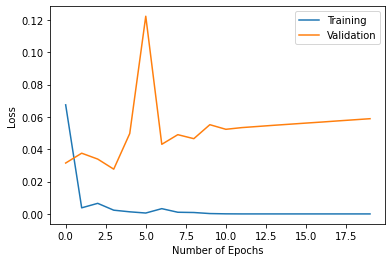

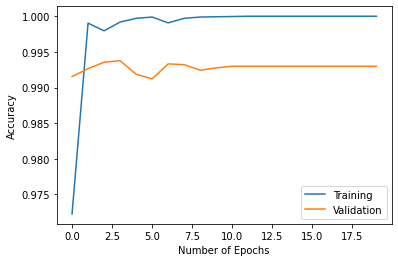

In [195]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

In [196]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(test_padded)
print(classification_report(y_test, y_pred, target_names = ['Fake','Real']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4724
        Real       0.99      0.99      0.99      4256

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Recall score: 0.99
Precision score: 0.99


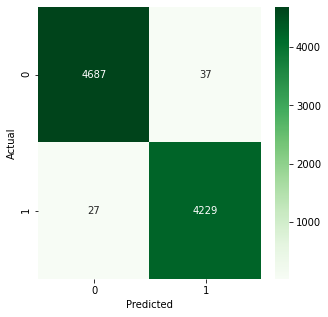

In [197]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

ar = metrics.confusion_matrix(y_test, y_pred)

conMat = pd.DataFrame(ar, index=[0,1], columns=[0,1])
conMat.index.name = 'Actual'
conMat.columns.name = 'Predicted'

plt.figure(figsize = (5, 5))
sns.heatmap(conMat,cmap= "Greens", annot = True, fmt='')

precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

print('Recall score: ' + str(round(recall_score, 2)))
print('Precision score: ' + str(round(precision_score, 2)))